In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
df['Salary'] = df['Salary']/10000
df.head()


,Experience Years,Salary
0,1.1,3.9343
1,1.2,4.2774
2,1.3,4.6205
3,1.5,3.7731
4,2.0,4.3525


In [3]:
df.iloc[0]['Experience Years']

np.float64(1.1)

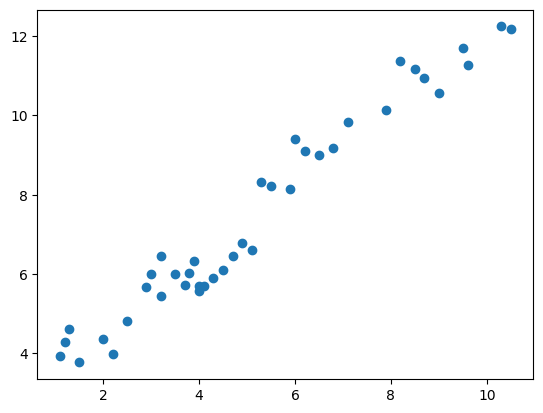

In [4]:
fig = plt.scatter(df['Experience Years'], df['Salary'])
fig.xlabel = 'Experience Years'
fig.ylabel = 'Salary'


In [5]:
df.shape

(40, 2)

0.9523650507417788 2.567301576052974


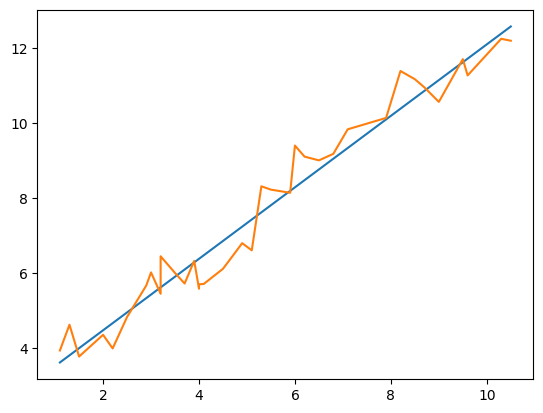

In [6]:
def gradient_descent(m, b, a):
    n = len(df)
    m_new = 0
    b_new = 0
    
    for i in range(n):
        x = df['Experience Years'].iloc[i]
        y = df['Salary'].iloc[i]
        m_new += 2*x*((x*m+b)-y)/n
        b_new += 2*((x*m+b)-y)/n
    
    m -= a*m_new
    b -= a*b_new

    return m, b

m = 0
b = 0

for i in range(10000):
    m, b = gradient_descent(m, b, 0.01)

print(m, b)
plt.plot(df['Experience Years'], df['Experience Years']*m+b)
plt.plot(df['Experience Years'], df['Salary'])

In [7]:
def MSE():
    n = len(df)
    ans = 0
    for i in range(n):
        x = df['Experience Years'].iloc[i]
        y = df['Salary'].iloc[i]
        ans += ((x*m)+b-y)**2
    return ans / n

print(MSE())


0.28960383653776184


In [8]:
data = df.to_numpy()
data.shape

(40, 2)

In [9]:
class LinearRegression:

    def __init__ (self, w, b):
        self.w = w
        self.b = b

    def Calc_error(self):
        m = data.shape[0]
        
        error = 0
        for i in range(m):
            error += (self.w * data[i][0] + self.b - data[i][1])**2
        
        return error / m
    
    def h(self, id):
        return self.w * data[id][0] + self.b

    def Gradient_descent(self, learning_rate):
        m = data.shape[0]
        dw = 0
        db = 0 

        for i in range(m):
            dw += 2 / m * data[i][0] * (self.h(i) - data[i][1])
            db += 2 / m * 1 * (self.h(i) - data[i][1])

        self.w -= learning_rate * dw
        self.b -= learning_rate * db

    def Fit(self, learning_rate, iterations):

        for i in range(iterations):
            self.Gradient_descent(learning_rate)
            
    

In [10]:
np.random.seed(42)

w_ini = np.random.rand() * 5
b_ini = np.random.rand() * 5

model = LinearRegression(w = w_ini, b = b_ini)

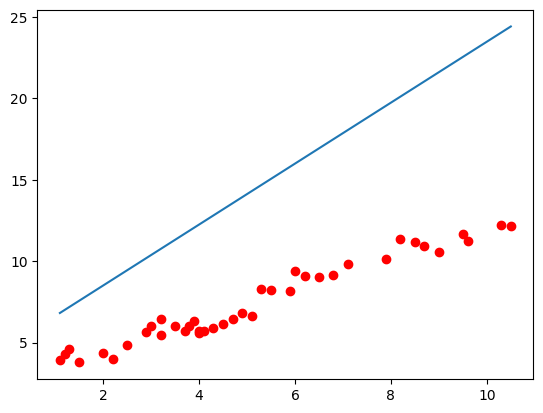

In [11]:
plt.plot(df['Experience Years'], df['Experience Years'] * w_ini + b_ini)
plt.scatter(df['Experience Years'], df['Salary'], c='red')

In [12]:
model.Fit(0.01, 100000)

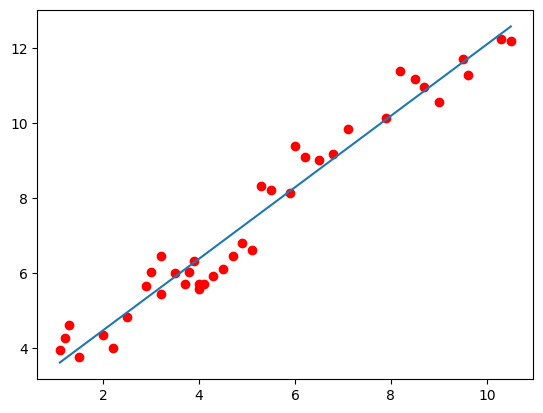

In [13]:
plt.plot(df['Experience Years'], df['Experience Years'] * model.w + model.b)
plt.scatter(df['Experience Years'], df['Salary'], c='red')

In [14]:
model.Calc_error()

np.float64(0.28960383653776184)